1. Cargamos las librerías necesarias

In [4]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

2. Cargar el archivo Excel con los datos

In [5]:
# Intentamos cargar el archivo
df = pd.read_excel("TechnicalAssessment.xlsx")

# Vemos las primeras filas
print(df.head())

# Checamos cuántas columnas tiene
print("Número de columnas:", df.shape[1])

  id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0  70172,Male,Loyal Customer,13,Personal Travel,E...                                                                                                                                                                                                                                                                                                                                               
1  5047,Male,disloyal Customer,25,Business travel...                                                                                                                                                                            

3. Preprocesamiento del archivo

In [6]:
# Cargamos el archivo Excel sin encabezado
df_raw = pd.read_excel("TechnicalAssessment.xlsx", header=None)

# Mostramos las primeras filas para ver cómo están los datos
print(df_raw.head())

# Separamos los valores por coma (",") y expandimos en columnas
df_clean = df_raw[0].str.split(",", expand=True)

# La primera fila tiene los nombres de las columnas, la tomamos para los encabezados
df_clean.columns = df_clean.iloc[0]
df_clean = df_clean.drop(index=0).reset_index(drop=True)

# Mostramos las primeras filas ya con encabezados
print(df_clean.head())

# Verificamos el número de columnas después de la limpieza
print("Número de columnas:", df_clean.shape[1])

                                                   0
0  id,Gender,Customer Type,Age,Type of Travel,Cla...
1  70172,Male,Loyal Customer,13,Personal Travel,E...
2  5047,Male,disloyal Customer,25,Business travel...
3  110028,Female,Loyal Customer,26,Business trave...
4  24026,Female,Loyal Customer,25,Business travel...
0      id  Gender      Customer Type Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer  13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer  25  Business travel  Business   
2  110028  Female     Loyal Customer  26  Business travel  Business   
3   24026  Female     Loyal Customer  25  Business travel  Business   
4  119299    Male     Loyal Customer  61  Business travel  Business   

0 Flight Distance Inflight wifi service Departure/Arrival time convenient  \
0             460                     3                                 4   
1             235                     3                                 2   
2            1142       

4. Descripción general de los datos

In [7]:
# Descripción general de las variables
print(df_clean.describe(include='all'))

0           id  Gender   Customer Type     Age   Type of Travel     Class  \
count   129880  129880          129880  129880           129880    129880   
unique  129880       3               3      78                3         4   
top      70172  Female  Loyal Customer      39  Business travel  Business   
freq         1   65896          106097    3691            89692     62158   

0      Flight Distance Inflight wifi service  \
count           129880                129880   
unique            3827                     7   
top                337                     2   
freq               840                 32319   

0      Departure/Arrival time convenient Ease of Online booking  ...  \
count                             129880                 129880  ...   
unique                                 8                      7  ...   
top                                    4                      3  ...   
freq                               31879                  30390  ...   

0      Infli

5. Conversión de columnas numéricas

In [8]:
# Seleccionamos las columnas numéricas
cols_numericas = ['Age', 'Flight Distance', 'Inflight wifi service',
                  'Departure/Arrival time convenient', 'Ease of Online booking',
                  'Gate location', 'Food and drink', 'Online boarding',
                  'Seat comfort', 'Inflight entertainment', 'On-board service',
                  'Leg room service', 'Baggage handling', 'Checkin service',
                  'Inflight service', 'Cleanliness',
                  'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Convertimos estas columnas a formato numérico (forzamos con 'coerce' para valores no válidos)
df_clean[cols_numericas] = df_clean[cols_numericas].apply(pd.to_numeric, errors='coerce')

# Mostramos la cantidad de valores nulos en cada columna
print(df_clean.isnull().sum())

0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    1
Type of Travel                         0
Class                                  0
Flight Distance                       13
Inflight wifi service                  4
Departure/Arrival time convenient      6
Ease of Online booking                10
Gate location                         15
Food and drink                        10
Online boarding                       12
Seat comfort                           3
Inflight entertainment                 3
On-board service                       3
Leg room service                       2
Baggage handling                       6
Checkin service                        2
Inflight service                       5
Cleanliness                            1
Departure Delay in Minutes            15
Arrival Delay in Minutes             394
satisfaction                           0
dtype: int64


6. Verificación del tamaño del dataset

In [9]:
# Verificamos el número total de filas
print("Total de filas:", df_clean.shape[0])

Total de filas: 129880


7. Imputación de valores faltantes

In [10]:
# Definimos las columnas con valores nulos a imputar
columnas_a_imputar = ['Age', 'Flight Distance', 'Inflight wifi service',
                      'Departure/Arrival time convenient', 'Ease of Online booking',
                      'Gate location', 'Food and drink', 'Online boarding',
                      'Seat comfort', 'Inflight entertainment', 'On-board service',
                      'Leg room service', 'Baggage handling', 'Checkin service',
                      'Inflight service', 'Cleanliness', 'Departure Delay in Minutes']

# Imputamos los valores nulos con la mediana de cada columna (más robusto frente a outliers)
for col in columnas_a_imputar:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Imputamos la columna 'Arrival Delay in Minutes' con 0 (si se considera razonable)
df_clean['Arrival Delay in Minutes'] = df_clean['Arrival Delay in Minutes'].fillna(0)

8. Verificación final de valores nulos

In [11]:
# Verificamos si aún quedan valores nulos
print(df_clean.isnull().sum().sum())  # Debe dar 0 si todo está limpio
# Verificamos si aún quedan valores nulos
if df_clean.isnull().sum().sum() == 0:
    print("¡Los datos están limpios! No hay valores nulos.")
else:
    print("Aún quedan valores nulos en los datos.")

0
¡Los datos están limpios! No hay valores nulos.


# 1. Análisis Estadístico Básico

In [12]:
# Realizamos un análisis estadístico básico de las variables numéricas
estadisticas_descriptivas = df_clean[cols_numericas].describe()

# Mostramos el resumen estadístico
print(estadisticas_descriptivas)

0                Age  Flight Distance  Inflight wifi service  \
count  129880.000000     1.298800e+05          129880.000000   
mean       39.469341     1.216864e+03               2.728703   
std        20.470480     8.428338e+03               1.329316   
min         7.000000     0.000000e+00               0.000000   
25%        27.000000     4.140000e+02               2.000000   
50%        40.000000     8.440000e+02               3.000000   
75%        51.000000     1.744000e+03               4.000000   
max      5000.000000     3.000000e+06               5.000000   

0      Departure/Arrival time convenient  Ease of Online booking  \
count                      129880.000000           129880.000000   
mean                            3.057607                2.756929   
std                             1.526683                1.401691   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%            

Visualización de Datos

Media de las variables seleccionadas:
 0
Age                             39.469341
Flight Distance               1216.864105
Departure Delay in Minutes      91.701725
Arrival Delay in Minutes       122.835987
dtype: float64

Mediana de las variables seleccionadas:
 0
Age                            40.0
Flight Distance               844.0
Departure Delay in Minutes      0.0
Arrival Delay in Minutes        0.0
dtype: float64

Moda de las variables seleccionadas:
 0
Age                            39.0
Flight Distance               337.0
Departure Delay in Minutes      0.0
Arrival Delay in Minutes        0.0
Name: 0, dtype: float64


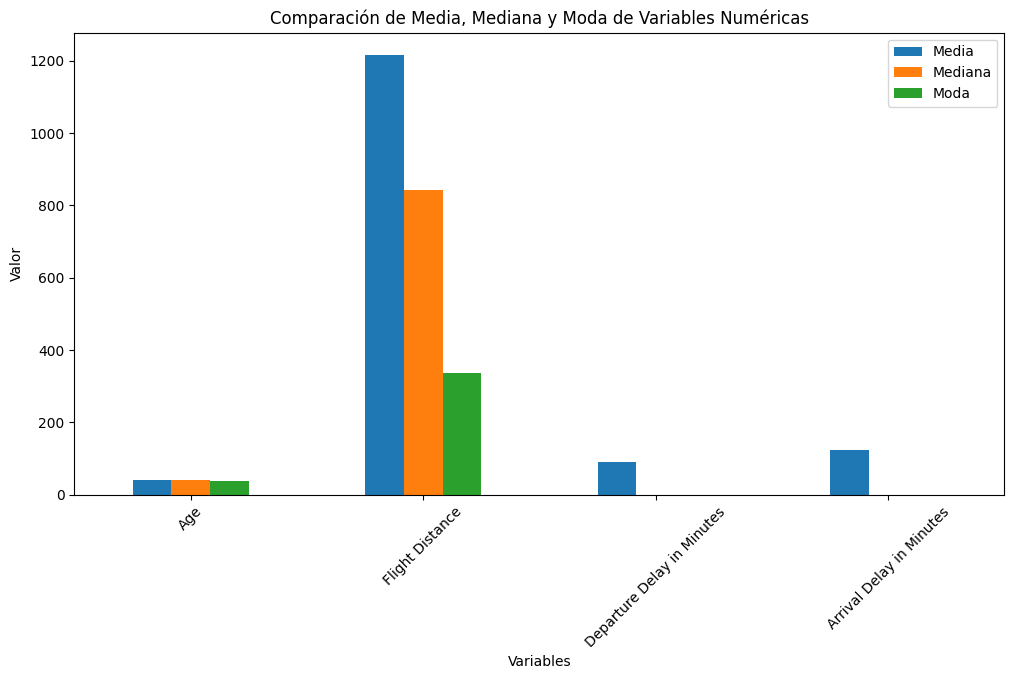

In [13]:
# Parte 3: Visualización de media, mediana y moda

# Seleccionamos algunas columnas numéricas para analizar
vars_analizar = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Calculamos la media, mediana y moda de las variables seleccionadas
media = df_clean[vars_analizar].mean()
mediana = df_clean[vars_analizar].median()
moda = df_clean[vars_analizar].mode().iloc[0]

# Mostramos la media, mediana y moda
print("Media de las variables seleccionadas:\n", media)
print("\nMediana de las variables seleccionadas:\n", mediana)
print("\nModa de las variables seleccionadas:\n", moda)

# Graficamos las medias, medianas y modas en barras
df_summary = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Moda': moda})

df_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Media, Mediana y Moda de Variables Numéricas')
plt.ylabel('Valor')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.show()

 Diagramas de Caja (Boxplots)

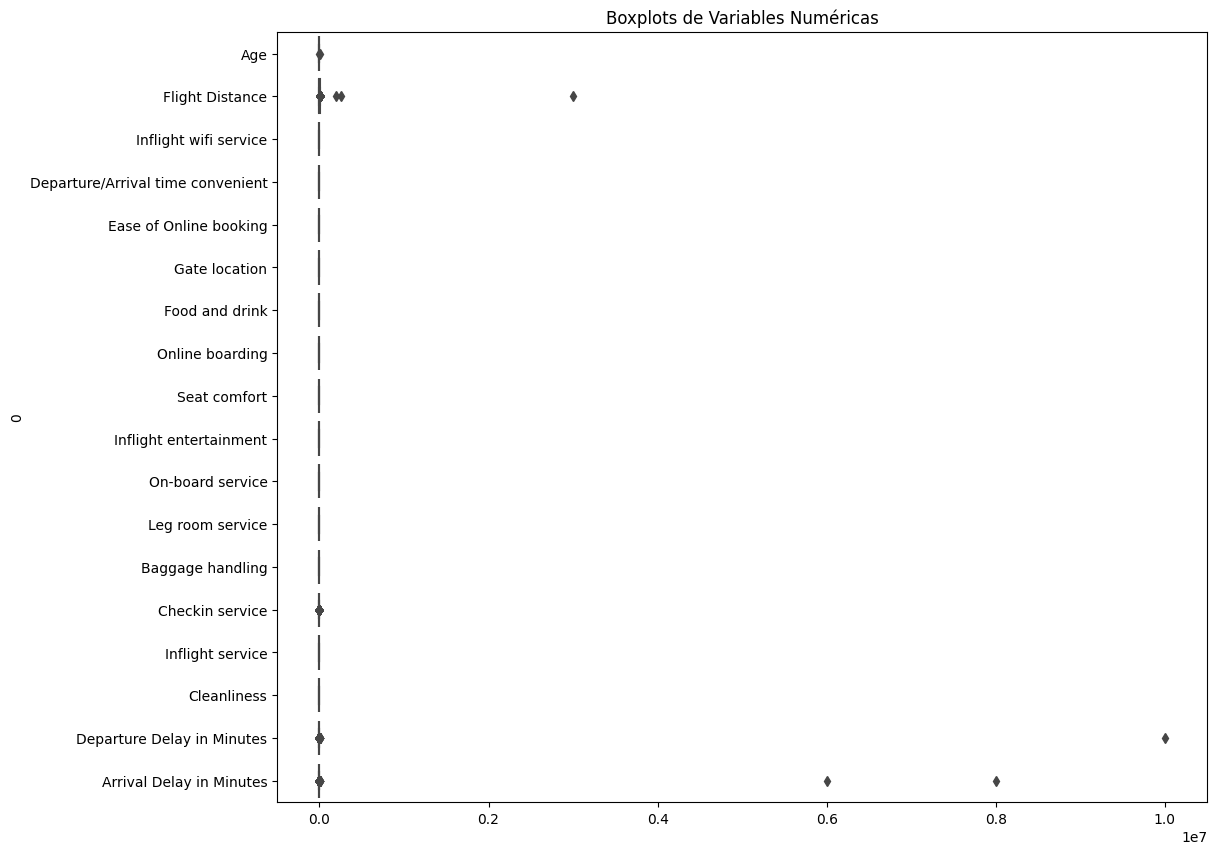

In [14]:
# Generamos boxplots para las variables numéricas
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_clean[cols_numericas], orient='h')
plt.title('Boxplots de Variables Numéricas')
plt.show()

Pairplot to visualize relationships between numerical variables

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

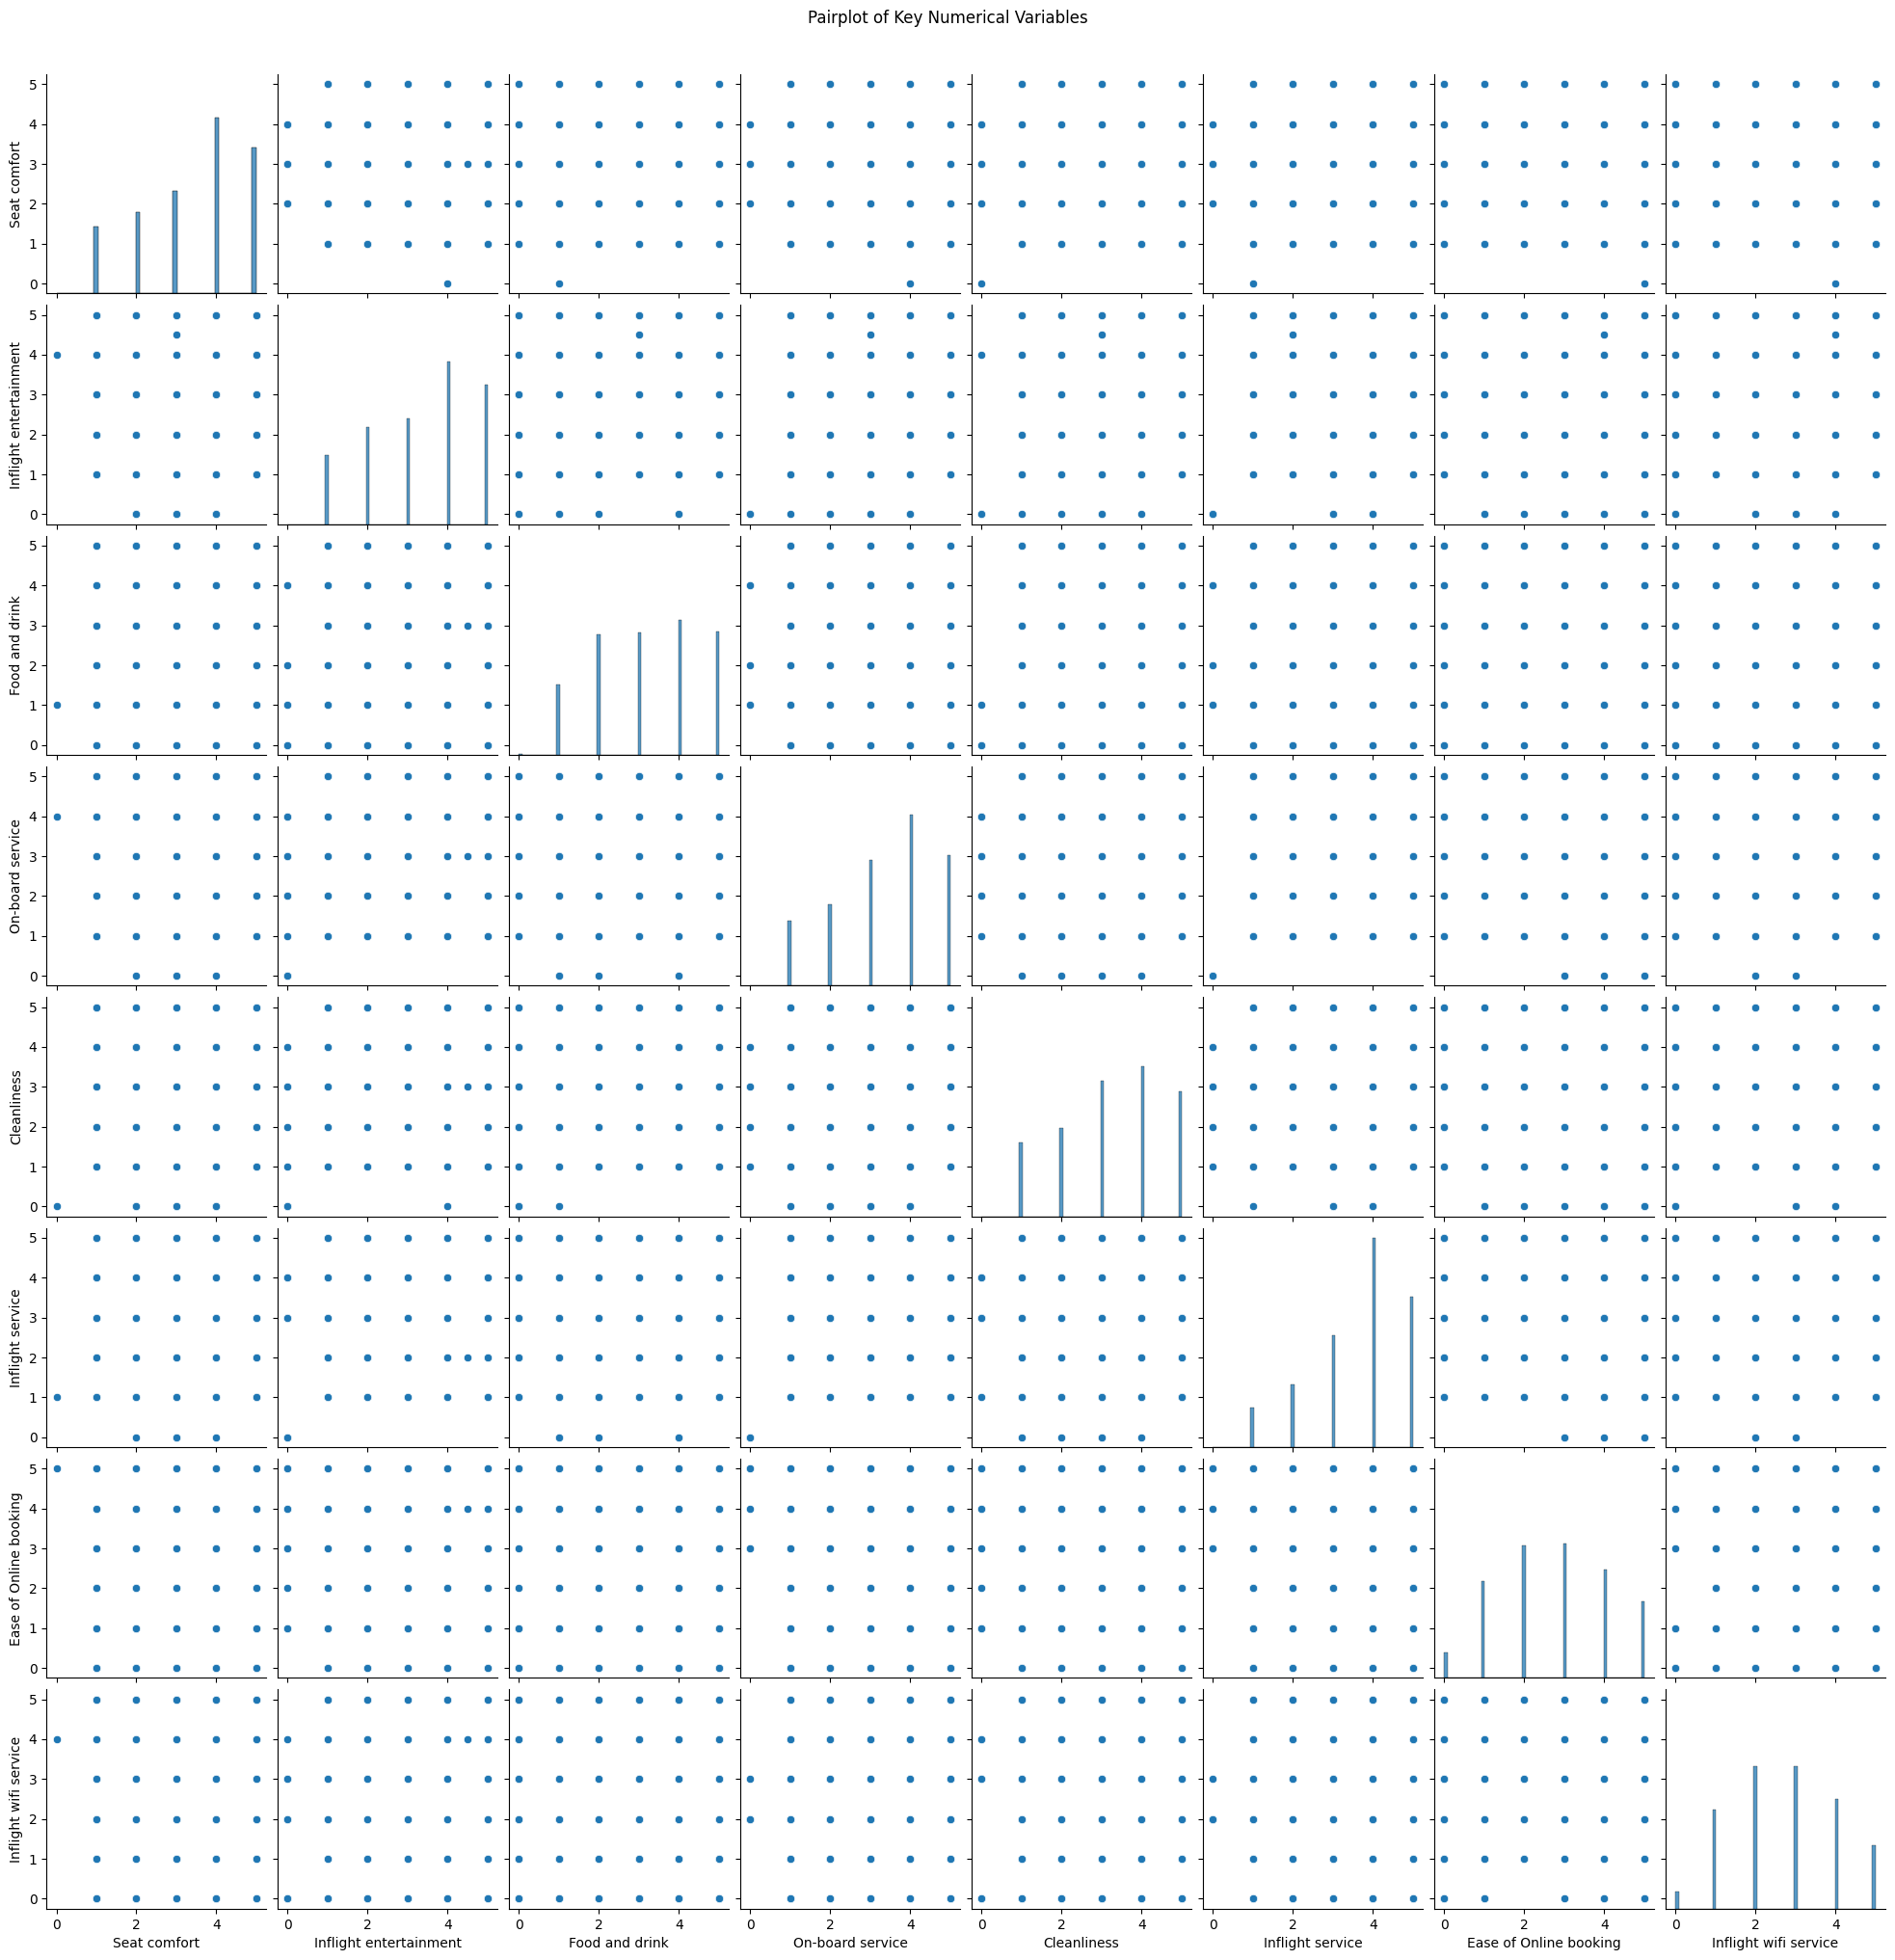

Correlation Matrix of Key Variables:
 0                       Seat comfort  Inflight entertainment  Food and drink  \
0                                                                              
Seat comfort                1.000000                0.611740        0.575843   
Inflight entertainment      0.611740                1.000000        0.623359   
Food and drink              0.575843                0.623359        1.000000   
On-board service            0.130521                0.418591        0.057391   
Cleanliness                 0.679555                0.692453        0.657982   
Inflight service            0.068802                0.406065        0.035185   
Ease of Online booking      0.028566                0.046591        0.030531   
Inflight wifi service       0.121512                0.207802        0.132266   

0                       On-board service  Cleanliness  Inflight service  \
0                                                                         
Seat comfor

In [15]:
# Pairplot para visualizar relaciones entre variables numéricas
cols_pairplot = ['Seat comfort', 'Inflight entertainment', 'Food and drink', 
                 'On-board service', 'Cleanliness', 'Inflight service', 
                 'Ease of Online booking', 'Inflight wifi service']

# Graficamos todas las dispersiones entre estas variables
sns.pairplot(df_clean[cols_pairplot])
plt.suptitle('Pairplot of Key Numerical Variables', y=1.02)
plt.show()

# --------------------------------------------
# Matriz de correlación general
# --------------------------------------------
Corr_Factors = df_clean[cols_pairplot].corr()
print("Correlation Matrix of Key Variables:\n", Corr_Factors)

Análisis de correlación: Mapa de calor

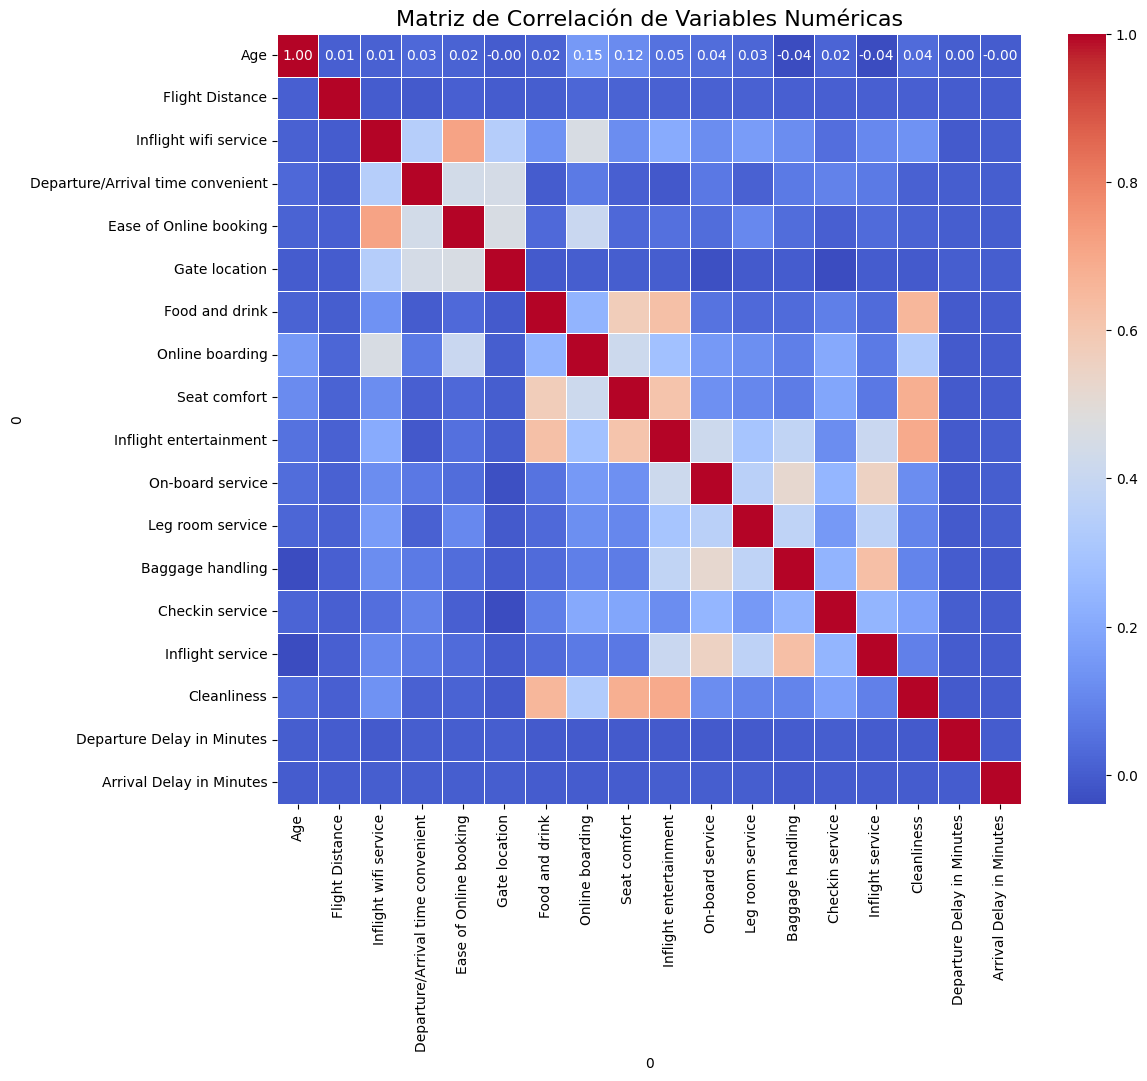

In [16]:
# Calculamos la matriz de correlación
corr_matrix = df_clean[cols_numericas].corr()

# Generamos el mapa de calor con una paleta de colores personalizada
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

# Correlations

Correlation between "Ease of Online booking" and "Inflight wifi service"

Correlation between Ease of Online booking and Inflight Wifi Service: 0.714758476461446


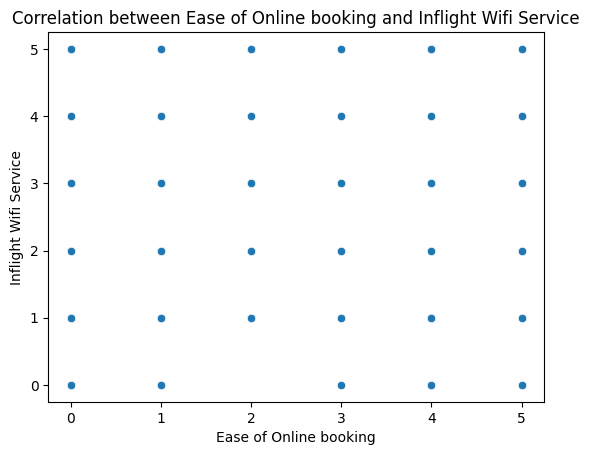

In [17]:
# Correlation between Ease of Online booking and Inflight Wifi Service
corr_online_booking_wifi = df_clean['Ease of Online booking'].corr(df_clean['Inflight wifi service'])
print(f"Correlation between Ease of Online booking and Inflight Wifi Service: {corr_online_booking_wifi}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Ease of Online booking', y='Inflight wifi service', data=df_clean)
plt.title("Correlation between Ease of Online booking and Inflight Wifi Service")
plt.xlabel("Ease of Online booking")
plt.ylabel("Inflight Wifi Service")
plt.show()

Correlation between "Seat comfort" and "Inflight entertainment"

Correlation between Seat Comfort and Inflight Entertainment: 0.6117396787679633


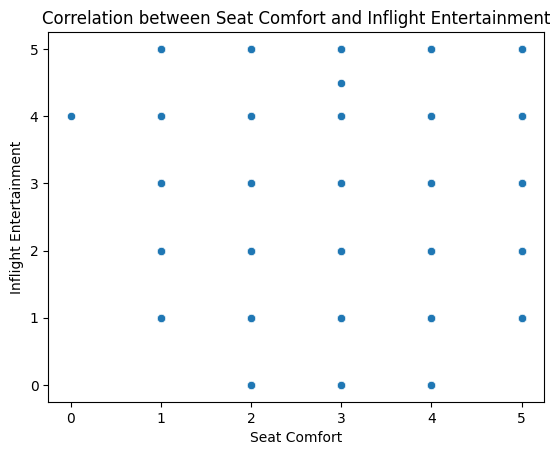

In [18]:
# Correlation between Seat Comfort and Inflight Entertainment
corr_seat_inflight_entertainment = df_clean['Seat comfort'].corr(df_clean['Inflight entertainment'])
print(f"Correlation between Seat Comfort and Inflight Entertainment: {corr_seat_inflight_entertainment}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Seat comfort', y='Inflight entertainment', data=df_clean)
plt.title("Correlation between Seat Comfort and Inflight Entertainment")
plt.xlabel("Seat Comfort")
plt.ylabel("Inflight Entertainment")
plt.show()

Correlation between "Seat comfort" and "Food and drink"

Correlation between Seat Comfort and Food and Drink: 0.5758434272751362


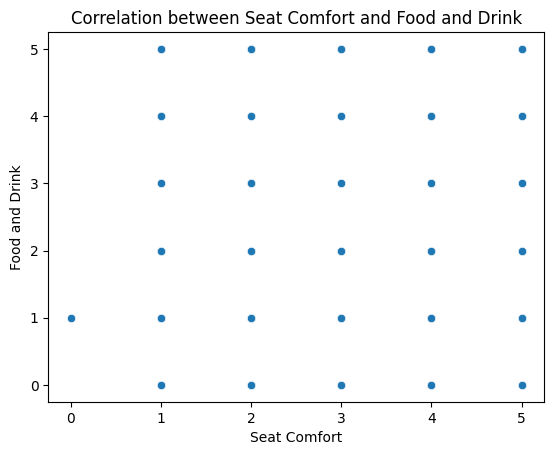

In [19]:
# Correlation between Seat Comfort and Food and Drink
corr_seat_food_drink = df_clean['Seat comfort'].corr(df_clean['Food and drink'])
print(f"Correlation between Seat Comfort and Food and Drink: {corr_seat_food_drink}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Seat comfort', y='Food and drink', data=df_clean)
plt.title("Correlation between Seat Comfort and Food and Drink")
plt.xlabel("Seat Comfort")
plt.ylabel("Food and Drink")
plt.show()

Correlation between Baggage Handling and Inflight Service

Correlation between Baggage Handling and Inflight Service: 0.6292125519825098


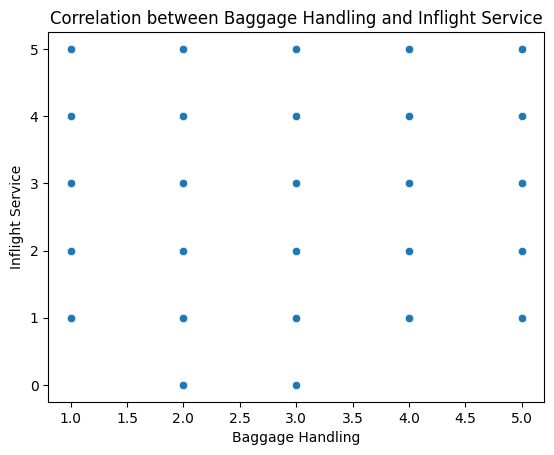

In [20]:
# Correlation between Baggage Handling and Inflight Service
corr_baggage_handling_inflight_service = df_clean['Baggage handling'].corr(df_clean['Inflight service'])
print(f"Correlation between Baggage Handling and Inflight Service: {corr_baggage_handling_inflight_service}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Baggage handling', y='Inflight service', data=df_clean)
plt.title("Correlation between Baggage Handling and Inflight Service")
plt.xlabel("Baggage Handling")
plt.ylabel("Inflight Service")
plt.show()

Correlation between "Inflight Entertainment" and "Cleanliness"

Correlation between Inflight Entertainment and Cleanliness: 0.6924533813718264


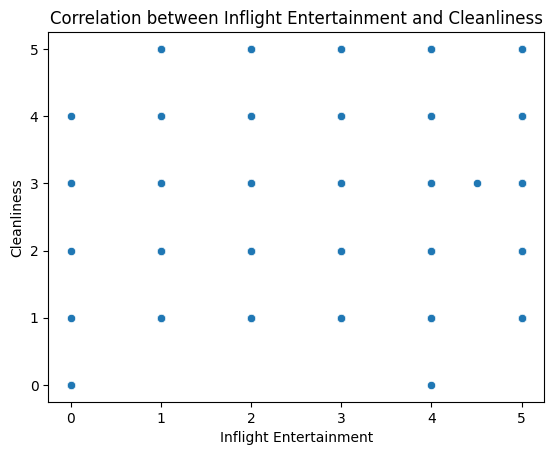

In [21]:
# Correlation between Inflight Entertainment and Cleanliness
corr_inflight_entertainment_cleanliness = df_clean['Inflight entertainment'].corr(df_clean['Cleanliness'])
print(f"Correlation between Inflight Entertainment and Cleanliness: {corr_inflight_entertainment_cleanliness}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Inflight entertainment', y='Cleanliness', data=df_clean)
plt.title("Correlation between Inflight Entertainment and Cleanliness")
plt.xlabel("Inflight Entertainment")
plt.ylabel("Cleanliness")
plt.show()

# 2. Key features that influence customer spending behavior

Bar chart for Customer Type, Trip Type and Class vs. Satisfaction

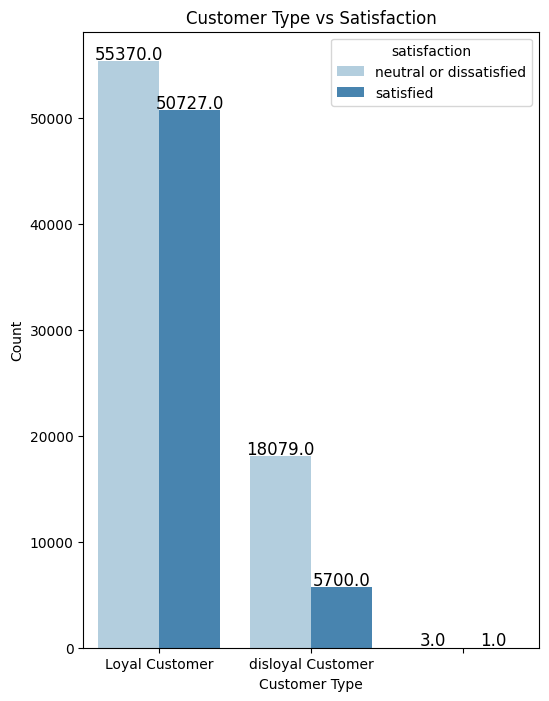

In [22]:
plt.figure(figsize=(20, 8))
# Bar plot for 'Customer Type' vs 'Satisfaction'
plt.subplot(1, 3, 1)
sns.countplot(x='Customer Type', hue='satisfaction', data=df_clean, palette="Blues")
plt.title('Customer Type vs Satisfaction')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Add numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

Pie chart for 'Customer Type'

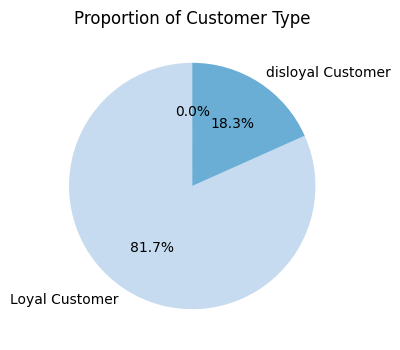

In [23]:
# Pie chart for 'Customer Type'
plt.figure(figsize=(4, 4))
customer_type_counts = df_clean['Customer Type'].value_counts()
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", n_colors=len(customer_type_counts)))
plt.title('Proportion of Customer Type')
plt.show()

Bar plot for 'Type of Travel' vs 'Satisfaction'

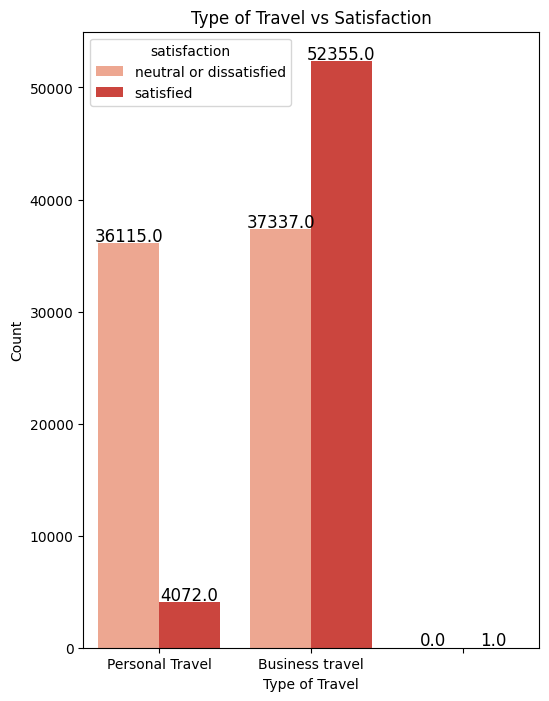

In [24]:
# Bar plot for 'Type of Travel' vs 'Satisfaction'
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 2)
sns.countplot(x='Type of Travel', hue='satisfaction', data=df_clean, palette="Reds")
plt.title('Type of Travel vs Satisfaction')
plt.xlabel('Type of Travel')
plt.ylabel('Count')

# Add numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')


# Pie chart for 'Type of Travel'

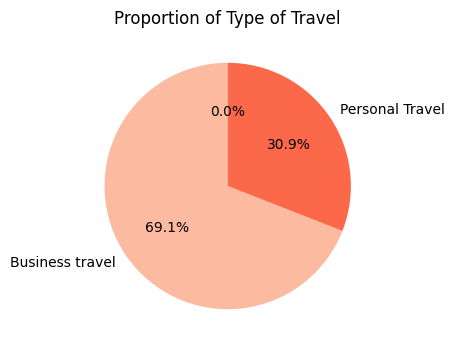

In [25]:
# Pie chart for 'Type of Travel'
plt.figure(figsize=(4, 4))
type_of_travel_counts = df_clean['Type of Travel'].value_counts()
plt.pie(type_of_travel_counts, labels=type_of_travel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Reds", n_colors=len(type_of_travel_counts)))
plt.title('Proportion of Type of Travel')
plt.show()

Bar plot for 'Class' vs 'Satisfaction'

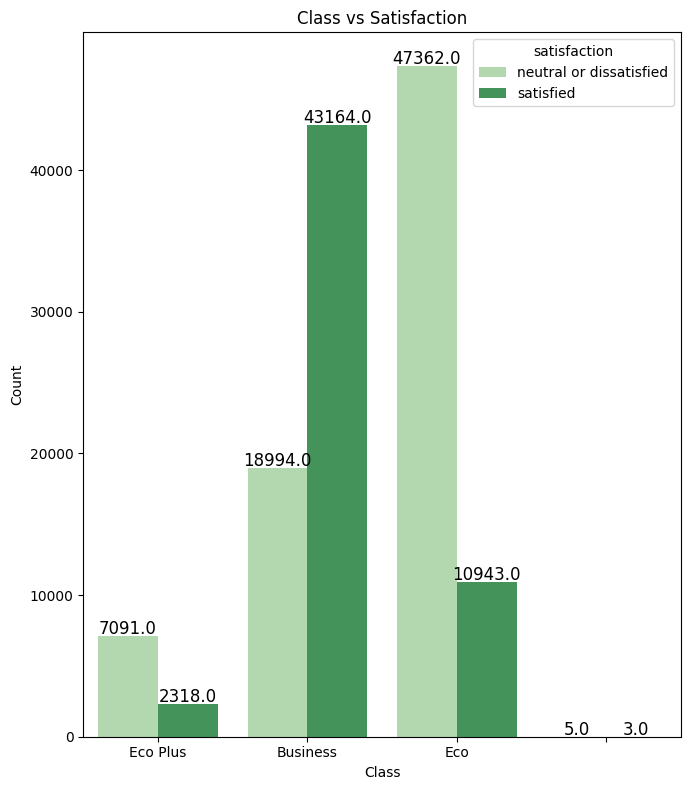

In [26]:
# Bar plot for 'Class' vs 'Satisfaction'
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 3)
sns.countplot(x='Class', hue='satisfaction', data=df_clean, palette="Greens")
plt.title('Class vs Satisfaction')
plt.xlabel('Class')
plt.ylabel('Count')

# Add numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()


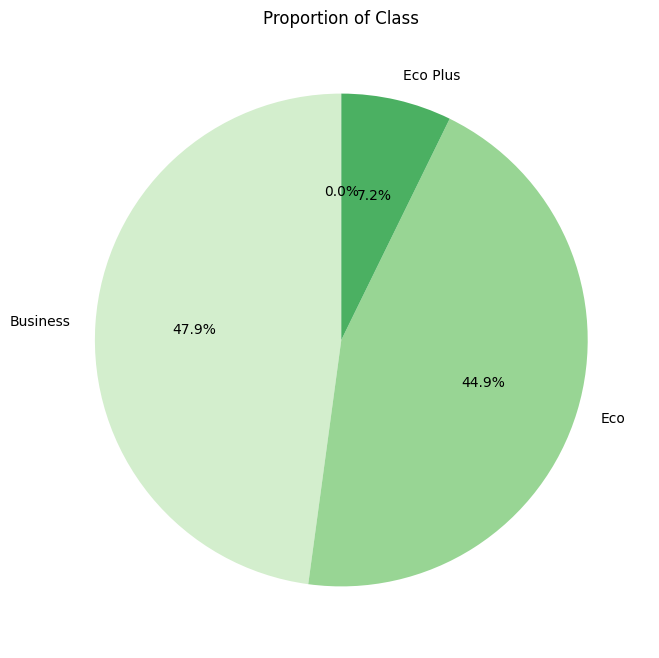

In [27]:
# Pie chart for 'Class'
plt.figure(figsize=(8, 8))
class_counts = df_clean['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Greens", n_colors=len(class_counts)))
plt.title('Proportion of Class')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20896\1468495584.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Class', y='Age', hue='Gender', data=df_filtered, palette='Reds', ci=None)


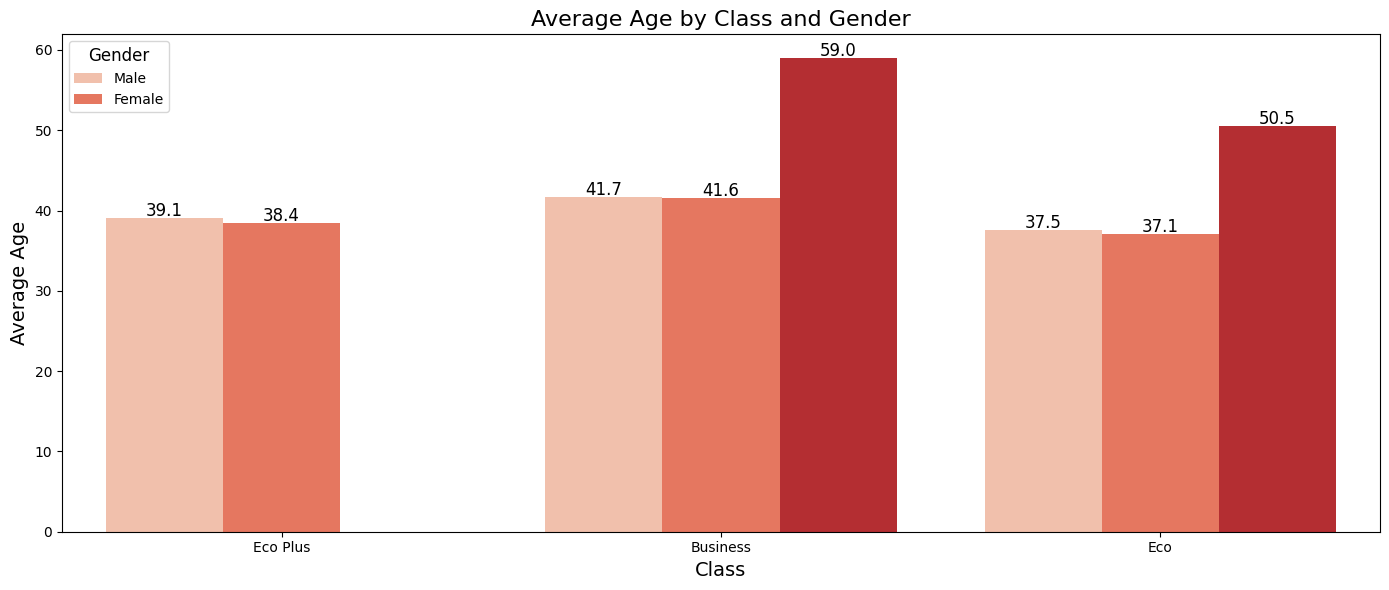

In [28]:
# Filter the data to include only the three classes
df_filtered = df_clean[df_clean['Class'].isin(['Eco', 'Eco Plus', 'Business'])]

# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Class', y='Age', hue='Gender', data=df_filtered, palette='Reds', ci=None)

# Customize the title and labels
plt.title('Average Age by Class and Gender', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Average Age', fontsize=14)

# Add numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', 
                       xytext=(0, 5), textcoords='offset points')

# Adjust the legend
plt.legend(title='Gender', title_fontsize=12, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [29]:
# Convert categorical variables to numerical codes
df_encoded = df_clean.copy()
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in cat_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

In [30]:
# Suggested variables related to spending behavior
variables_spending = ['Customer Type', 'Age', 'Class', 'Flight Distance', 
                      'Inflight wifi service', 'Food and drink', 'Seat comfort',
                      'Inflight entertainment', 'On-board service', 
                      'Departure/Arrival time convenient', 'Leg room service', 
                      'Baggage handling', 'Departure Delay in Minutes', 
                      'Arrival Delay in Minutes', 'Gender']

# Make sure they're in the DataFrame
df_spending = df_encoded[variables_spending]


In [31]:
# Calculate the correlation matrix
corr_matrix = df_spending.corr()

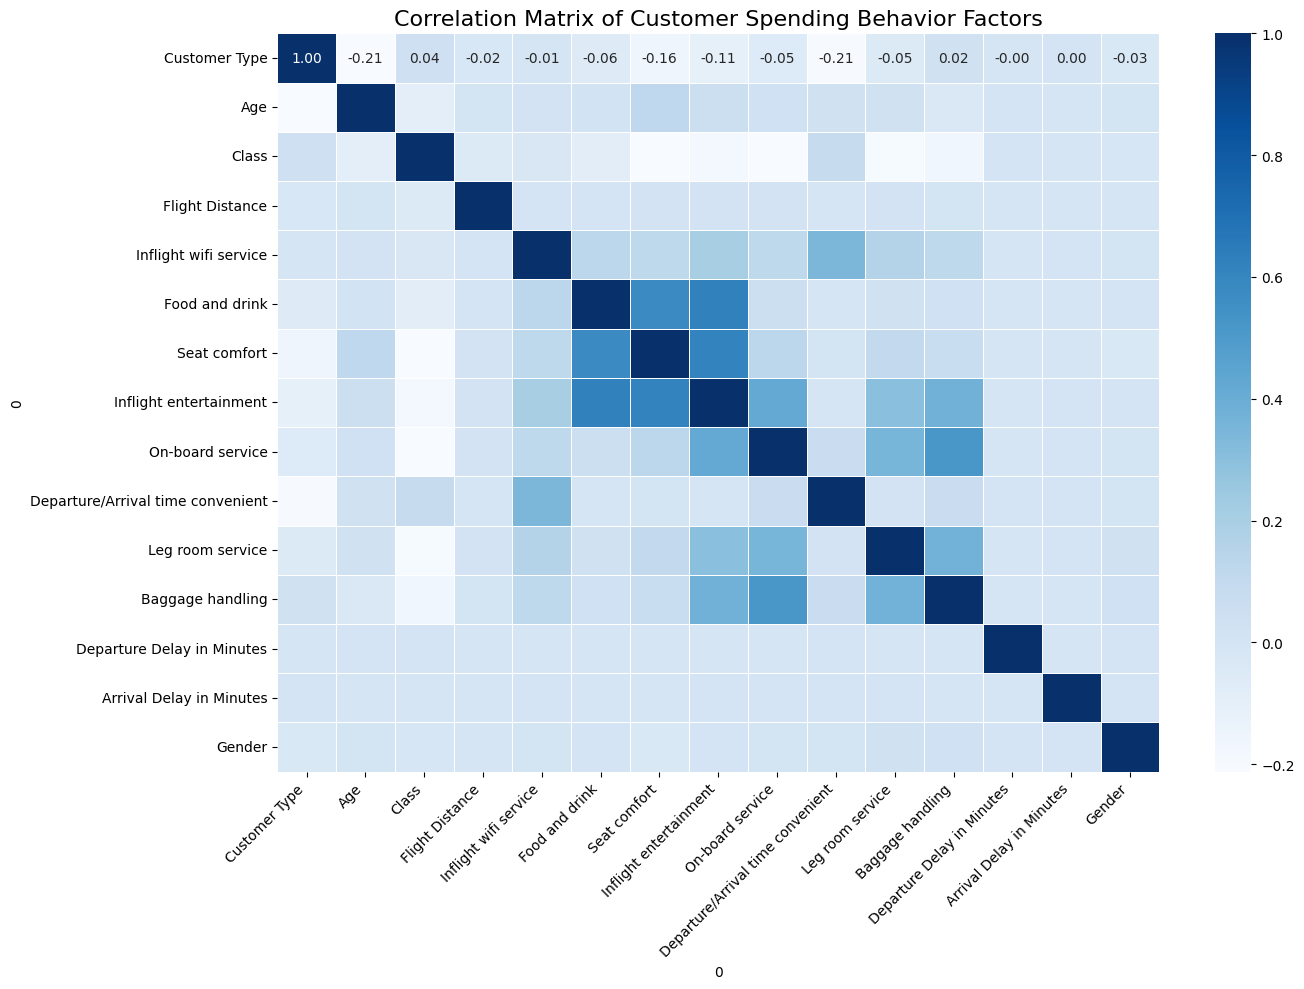

In [32]:
# Heatmap of the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Customer Spending Behavior Factors', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Baggage Handling vs On-board Service

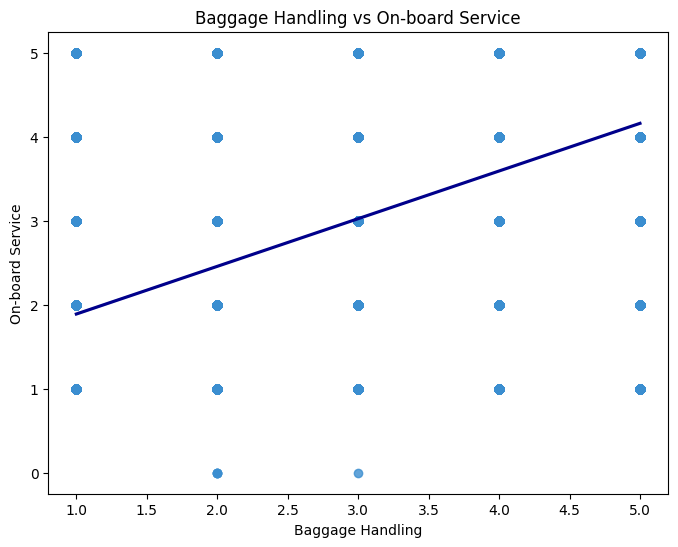

In [33]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_clean, x='Baggage handling', y='On-board service', scatter_kws={'color': '#3B8ED0'}, line_kws={'color': 'darkblue'})
plt.title('Baggage Handling vs On-board Service')
plt.xlabel('Baggage Handling')
plt.ylabel('On-board Service')
plt.show()


Baggage Handling vs Inflight Wifi Service

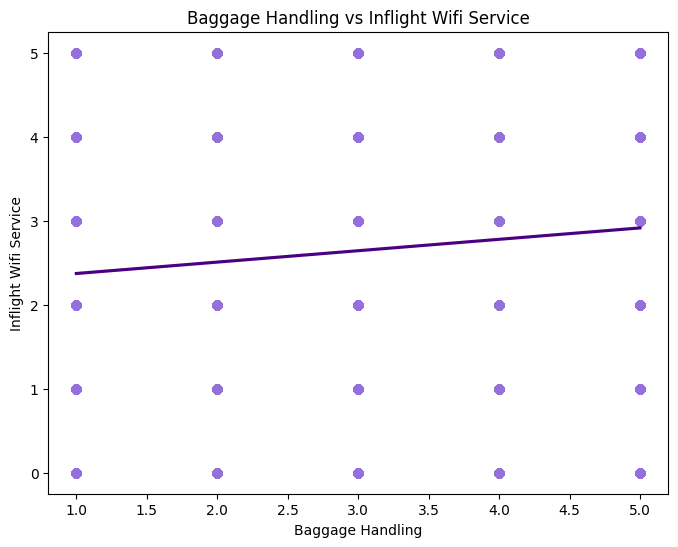

In [34]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_clean, x='Baggage handling', y='Inflight wifi service', scatter_kws={'color': '#9370DB'}, line_kws={'color': '#4B0082'})
plt.title('Baggage Handling vs Inflight Wifi Service')
plt.xlabel('Baggage Handling')
plt.ylabel('Inflight Wifi Service')
plt.show()


Departure/Arrival Time Convenient vs Class

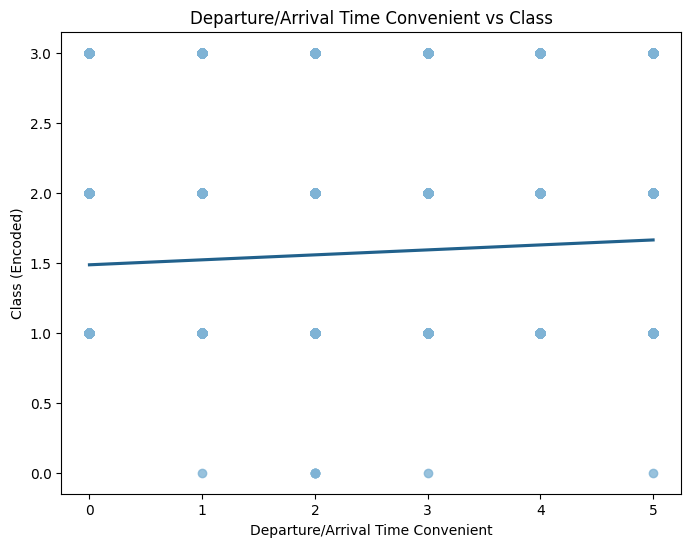

In [35]:
df_encoded = df_clean.copy()
df_encoded['Class'] = df_encoded['Class'].astype('category').cat.codes

plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Departure/Arrival time convenient', y='Class', scatter_kws={'color': '#7FB3D5'}, line_kws={'color': '#21618C'})
plt.title('Departure/Arrival Time Convenient vs Class')
plt.xlabel('Departure/Arrival Time Convenient')
plt.ylabel('Class (Encoded)')
plt.show()

Seat Comfort vs Age

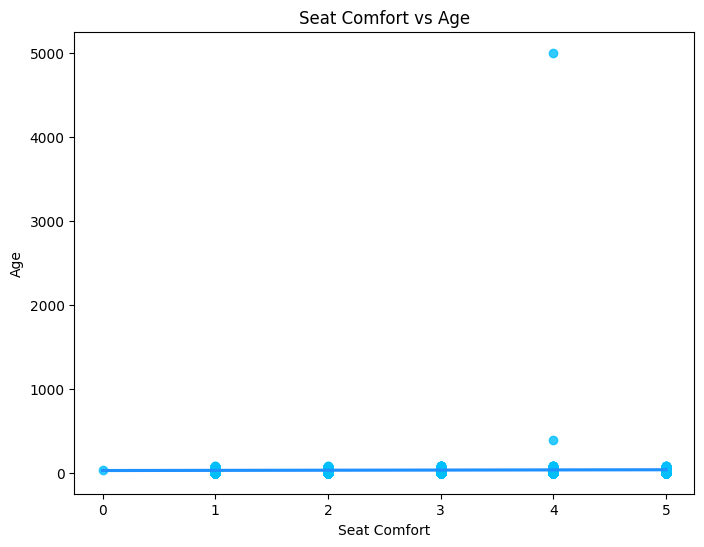

In [36]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Seat comfort', y='Age', scatter_kws={'color': '#00BFFF'}, line_kws={'color': '#1E90FF'})
plt.title('Seat Comfort vs Age')
plt.xlabel('Seat Comfort')
plt.ylabel('Age')
plt.show()

Customer Type vs Class

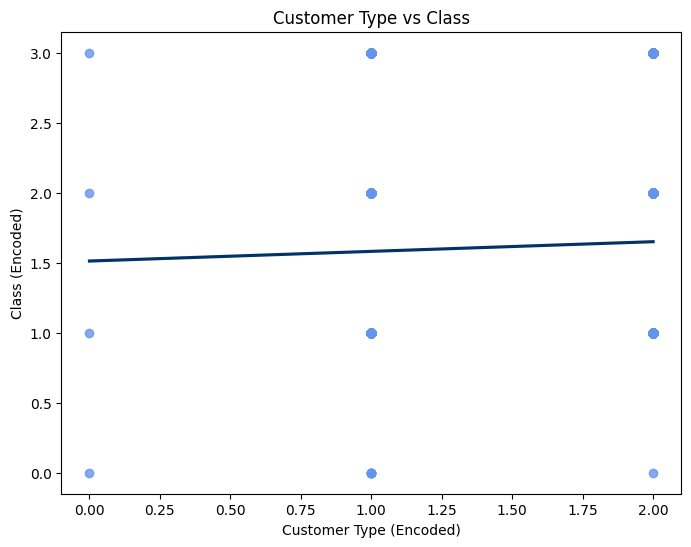

In [37]:
df_encoded['Customer Type'] = df_encoded['Customer Type'].astype('category').cat.codes

plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Customer Type', y='Class', scatter_kws={'color': '#6495ED'}, line_kws={'color': '#003366'})
plt.title('Customer Type vs Class')
plt.xlabel('Customer Type (Encoded)')
plt.ylabel('Class (Encoded)')
plt.show()


Customer Type vs Class

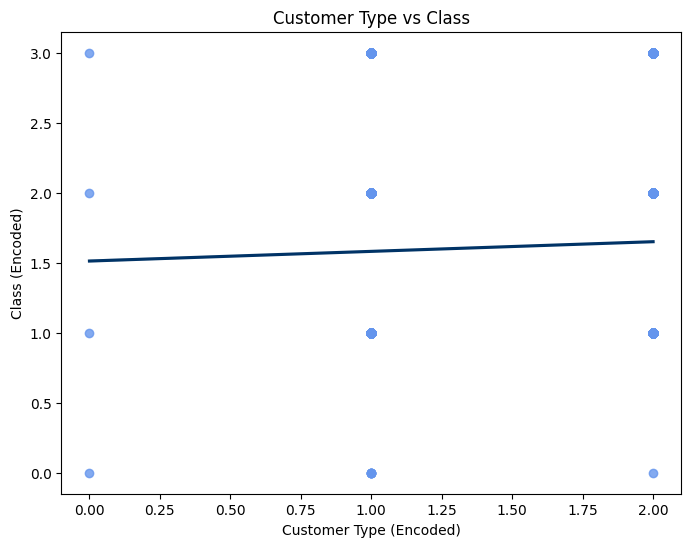

In [38]:
df_encoded['Customer Type'] = df_encoded['Customer Type'].astype('category').cat.codes

plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Customer Type', y='Class', scatter_kws={'color': '#6495ED'}, line_kws={'color': '#003366'})
plt.title('Customer Type vs Class')
plt.xlabel('Customer Type (Encoded)')
plt.ylabel('Class (Encoded)')
plt.show()


Class vs Departure vs Arrival Time Convenient

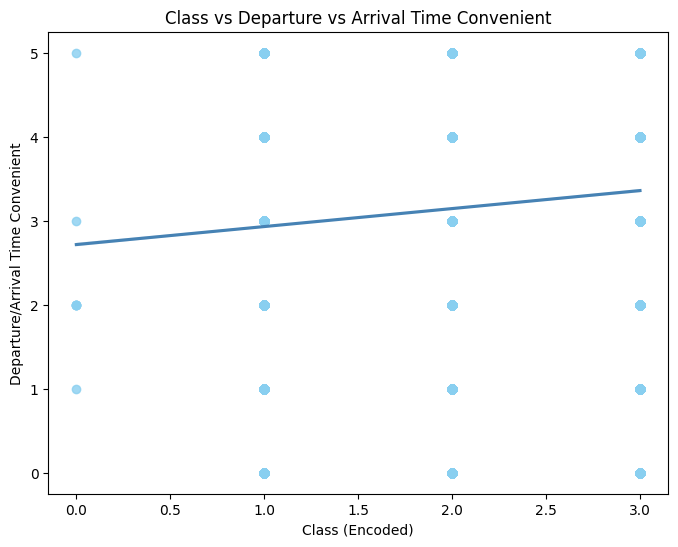

In [39]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Class', y='Departure/Arrival time convenient', scatter_kws={'color': '#89CFF0'}, line_kws={'color': '#4682B4'})
plt.title('Class vs Departure vs Arrival Time Convenient')
plt.xlabel('Class (Encoded)')
plt.ylabel('Departure/Arrival Time Convenient')
plt.show()

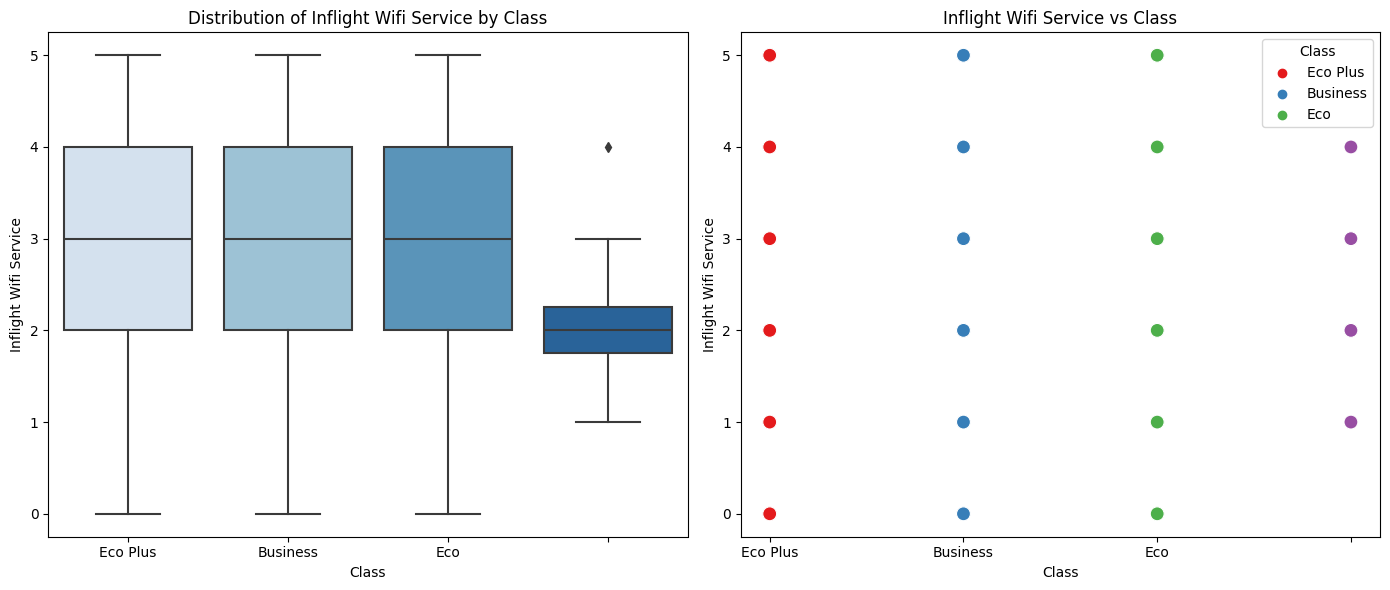

In [40]:
# Creamos los gráficos
plt.figure(figsize=(14, 6))

# Boxplot para la variable 'Inflight wifi service' por 'Class'
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Inflight wifi service', data=df_clean, palette='Blues')
plt.title('Distribution of Inflight Wifi Service by Class')
plt.xlabel('Class')
plt.ylabel('Inflight Wifi Service')

# Scatterplot para la relación entre 'Class' y 'Inflight wifi service'
plt.subplot(1, 2, 2)
sns.scatterplot(x='Class', y='Inflight wifi service', data=df_clean, hue='Class', palette='Set1', s=100)
plt.title('Inflight Wifi Service vs Class')
plt.xlabel('Class')
plt.ylabel('Inflight Wifi Service')

plt.tight_layout()
plt.show()

# 3. Regresión Lineal Simple para predecir el gasto del cliente